In [2]:
# read the saved dataset
import pandas as pd
newyork_bus_transit = pd.read_csv('../NYC-Bus Data/newyork_bus_transit_prep_2.csv').drop('Unnamed: 0',axis=1)

In [3]:
# get the relationship between bus_id and travel time
from scipy.stats import f_oneway

groups = [newyork_bus_transit[newyork_bus_transit["vehicle_id"] == v]["travel_time"] for v in newyork_bus_transit["vehicle_id"].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

ANOVA F-statistic: 172.8369027082891, p-value: 0.0


So the vehicle id have a effect on travel time. Because each vehicle id has differnt travel time pattern.

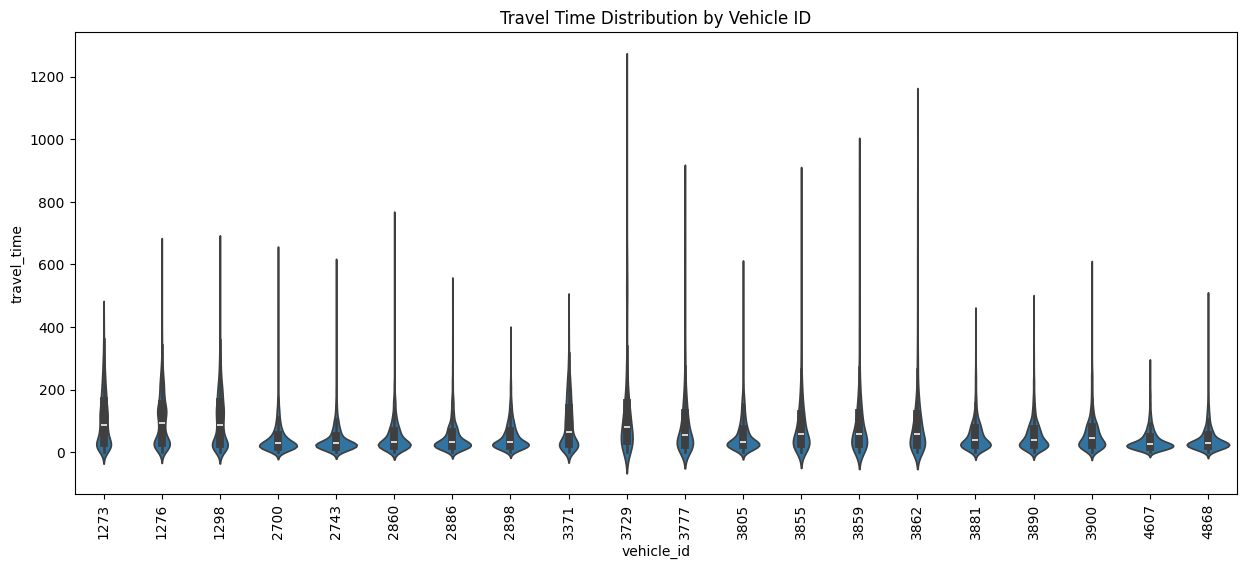

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

top_vehicles = newyork_bus_transit["vehicle_id"].value_counts().index[:20]
df_filtered = newyork_bus_transit[newyork_bus_transit["vehicle_id"].isin(top_vehicles)]

plt.figure(figsize=(15, 6))
# sns.boxplot(x="vehicle_id", y="travel_time", data=newyork_bus_transit)
sns.violinplot(x="vehicle_id", y="travel_time", data=df_filtered)
plt.xticks(rotation=90)  # Rotate for readability
plt.title("Travel Time Distribution by Vehicle ID")
plt.show()


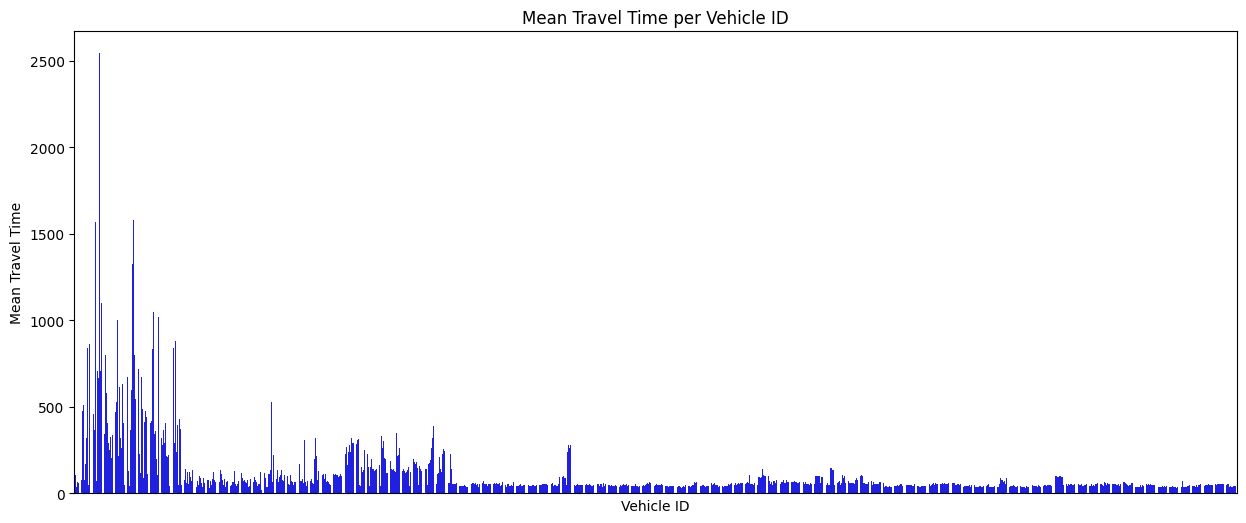

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute mean travel time for each vehicle_id
mean_travel_time = newyork_bus_transit.groupby("vehicle_id")["travel_time"].mean().reset_index()

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x="vehicle_id", y="travel_time", data=mean_travel_time, color="blue")

plt.xticks(rotation=90)
plt.xticks([], []) 
plt.xlabel("Vehicle ID")
plt.ylabel("Mean Travel Time")
plt.title("Mean Travel Time per Vehicle ID")
plt.show()


In [10]:
newyork_bus_transit.head()

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ArrivalTime,is_weekend,hour,is_peekhour,bus_stop,vehicle_id,travel_time
0,2017-06-01 00:02:05,0,B15,JFK AIRPORT,NYCT_6817,40.669059,-73.875665,DUMONT AV/FOUNTAIN AV,approaching,147.0,2017-06-01 00:03:56,False,0,False,3940,4387,111.0
1,2017-06-01 00:02:29,0,Q2,BELMONT PK 225 ST,NYCT_8503,40.713117,-73.735867,HEMPSTEAD AV/SPRINGFIELD BL,approaching,67.0,2017-06-01 00:03:56,False,0,False,5594,5705,87.0
2,2017-06-01 00:03:13,1,X1,ELTNGVLE TRANST CTR via HYLAN BL RICH AV,NYCT_2558,40.610616,-74.032467,NARROWS RD N/FINGERBOARD RD,2.1 miles away,3365.0,2017-06-01 00:06:33,False,0,False,7470,1578,200.0
3,2017-06-01 00:03:18,1,Q48,LAGUARDIA AIRPORT,NYCT_4189,40.758090,-73.861048,108 ST/NORTHERN BL,at stop,9.0,2017-06-01 00:03:56,False,0,False,149,2317,38.0
4,2017-06-01 00:03:20,1,Q56,BWAY JCT VN SNDRN AV,NYCT_4853,40.702378,-73.818499,JAMAICA AV/132 ST,< 1 stop away,195.0,2017-06-01 00:04:19,False,0,False,6066,2949,59.0


In [36]:
# filter 
at_stop_buses = newyork_bus_transit[newyork_bus_transit['ArrivalProximityText']=='at stop']
approaching_buses = newyork_bus_transit[newyork_bus_transit['ArrivalProximityText']=='approaching']
far_away_buses = newyork_bus_transit[(newyork_bus_transit['ArrivalProximityText']!='at stop') & (newyork_bus_transit['ArrivalProximityText']!='approaching')]

print('at stop buses shape : ', at_stop_buses.shape, '\napproaching buses shape : ', approaching_buses.shape, '\nfar away buses shape : ', far_away_buses.shape)

at stop buses shape :  (1415687, 17) 
approaching buses shape :  (2249311, 17) 
far away buses shape :  (2193136, 17)


In [37]:
# filter and keep only the common buses in all 3 tables
common_vehicle_ids = set(at_stop_buses["vehicle_id"]) & set(approaching_buses["vehicle_id"]) & set(far_away_buses["vehicle_id"])
common_bus_lines = set(at_stop_buses["PublishedLineName"]) & set(approaching_buses["PublishedLineName"]) & set(far_away_buses["PublishedLineName"])

at_stop_buses = at_stop_buses[at_stop_buses["vehicle_id"].isin(common_vehicle_ids)]
approaching_buses = approaching_buses[approaching_buses["vehicle_id"].isin(common_vehicle_ids)]
far_away_buses = far_away_buses[far_away_buses["vehicle_id"].isin(common_vehicle_ids)]

at_stop_buses = at_stop_buses[at_stop_buses["PublishedLineName"].isin(common_bus_lines)]
approaching_buses = approaching_buses[approaching_buses["PublishedLineName"].isin(common_bus_lines)]
far_away_buses = far_away_buses[far_away_buses["PublishedLineName"].isin(common_bus_lines)]

print('at stop buses shape : ', at_stop_buses.shape, '\napproaching buses shape : ', approaching_buses.shape, '\nfar away buses shape : ', far_away_buses.shape)


at stop buses shape :  (1415544, 17) 
approaching buses shape :  (2248661, 17) 
far away buses shape :  (2190488, 17)


In [31]:
at_stop_buses.nunique()

RecordedAtTime               151846
DirectionRef                      2
PublishedLineName               305
DestinationName                 745
VehicleRef                     5089
VehicleLocation.Latitude     199575
VehicleLocation.Longitude    190199
NextStopPointName              9573
ArrivalProximityText              1
DistanceFromStop                 31
ArrivalTime                   61360
is_weekend                        2
hour                             24
is_peekhour                       2
bus_stop                       9573
vehicle_id                     5089
travel_time                     245
dtype: int64

In [ ]:
# order according to vehicle_id and time
atstp_sorted = at_stop_buses.sort_values(by=["vehicle_id"]).reset_index(drop=True)
apprch_sorted = approaching_buses.sort_values(by=["vehicle_id"]).reset_index(drop=True)
faraway_sorted = far_away_buses.sort_values(by=["vehicle_id"]).reset_index(drop=True)

In [40]:
# calculate the count of each buses occurs in datsets
vehicle_counts_df1 = atstp_sorted["vehicle_id"].value_counts().reset_index()
vehicle_counts_df1.columns = ["vehicle_id", "count_df1"]

vehicle_counts_df2 = apprch_sorted["vehicle_id"].value_counts().reset_index()
vehicle_counts_df2.columns = ["vehicle_id", "count_df2"]

vehicle_counts_df3 = faraway_sorted["vehicle_id"].value_counts().reset_index()
vehicle_counts_df3.columns = ["vehicle_id", "count_df3"]

# Merge counts into one DataFrame
vehicle_counts = (
    vehicle_counts_df1
    .merge(vehicle_counts_df2, on="vehicle_id", how="outer")
    .merge(vehicle_counts_df3, on="vehicle_id", how="outer")
    .fillna(0)  # Fill missing values with 0 if a vehicle is missing in a dataset
)

vehicle_counts


,vehicle_id,count_df1,count_df2,count_df3
0,0,3,4.0,4
1,1,1,6.0,2
2,2,1,8.0,2
3,3,1,6.0,4
4,4,1,4.0,7
...,...,...,...,...
5089,5705,295,461.0,436
5090,5706,114,183.0,121
5091,5707,199,311.0,225
5092,5709,184,286.0,198


In [42]:
vehicle_counts.style.set_sticky().set_table_attributes("style='display:inline-block; overflow:auto; height:400px;'")

,vehicle_id,count_df1,count_df2,count_df3
0,0,3,4.000000,4
1,1,1,6.000000,2
2,2,1,8.000000,2
3,3,1,6.000000,4
4,4,1,4.000000,7
5,6,2,6.000000,4
6,7,4,4.000000,8
7,8,1,7.000000,7
8,11,3,5.000000,6
9,13,1,2.000000,4


In [46]:
# keep the vehicles which has more than 500 records in approaching dataset
vehicle_counts = apprch_sorted["vehicle_id"].value_counts()
vehicle_counts = vehicle_counts[vehicle_counts > 1000]
filtered_vehicle_ids = set(vehicle_counts.index)

# Filter all datasets
atstp_filtered = atstp_sorted[atstp_sorted["vehicle_id"].isin(filtered_vehicle_ids)]
apprch_filtered = apprch_sorted[apprch_sorted["vehicle_id"].isin(filtered_vehicle_ids)]
faraway_filtered = faraway_sorted[faraway_sorted["vehicle_id"].isin(filtered_vehicle_ids)]

In [47]:
print('at stop buses shape : ', atstp_filtered.shape, '\napproaching buses shape : ', apprch_filtered.shape, '\nfar away buses shape : ', faraway_filtered.shape)

at stop buses shape :  (14665, 17) 
approaching buses shape :  (23913, 17) 
far away buses shape :  (16019, 17)


In [52]:
apprch_filtered.sort_values(by=['VehicleRef', 'RecordedAtTime'])

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ArrivalTime,is_weekend,hour,is_peekhour,bus_stop,vehicle_id,travel_time
162838,2017-06-01 05:23:21,0,B43,GREENPOINT BOX ST,NYCT_343,40.663487,-73.957662,EMPIRE BL/BEDFORD AV,approaching,75.0,2017-06-01 05:23:57,False,5,False,4559,1904,36.0
162949,2017-06-01 05:43:28,0,B43,GREENPOINT BOX ST,NYCT_343,40.697607,-73.943827,THROOP AV/PARK AV,approaching,106.0,2017-06-01 05:43:54,False,5,False,9366,1904,26.0
162669,2017-06-01 05:53:25,0,B43,GREENPOINT BOX ST,NYCT_343,40.712953,-73.944125,GRAHAM AV/AINSLIE ST,approaching,47.0,2017-06-01 05:53:52,False,5,False,5304,1904,27.0
162161,2017-06-01 06:03:21,0,B43,GREENPOINT BOX ST,NYCT_343,40.734135,-73.954906,MANHATTAN AV/EAGLE ST,approaching,147.0,2017-06-01 06:03:47,False,6,True,6965,1904,26.0
162445,2017-06-01 06:33:45,1,B43,LEFRTS GDNS PROSPCT PK STA,NYCT_343,40.720790,-73.946505,GRAHAM AV/MEEKER AV,approaching,149.0,2017-06-01 06:34:29,False,6,True,5313,1904,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823643,2017-06-30 22:23:26,0,B44,WILLAMSBURG BRIDGE PLZ via NOSTRAND,NYCT_7364,40.593733,-73.940515,NOSTRAND AV/AV X,approaching,59.0,2017-06-30 22:23:35,False,22,False,7733,4868,9.0
1823898,2017-06-30 23:02:56,0,B44,WILLAMSBURG BRIDGE PLZ via NOSTRAND,NYCT_7364,40.671021,-73.947609,NEW YORK AV/ST JOHNS PL,approaching,33.0,2017-06-30 23:03:28,False,23,False,7592,4868,32.0
1823763,2017-06-30 23:13:27,0,B44,WILLAMSBURG BRIDGE PLZ via NOSTRAND,NYCT_7364,40.687347,-73.954704,BEDFORD AV/GREENE AV,approaching,106.0,2017-06-30 23:13:53,False,23,False,2641,4868,26.0
1824273,2017-06-30 23:43:54,1,B44,EMMONS AV,NYCT_7364,40.686411,-73.950778,NOSTRAND AV/GATES AV,approaching,60.0,2017-06-30 23:44:05,False,23,False,7749,4868,11.0


we cant use this dataset to multiple route scenarios
but this can be adjusted to single route scenario